<a href="https://colab.research.google.com/github/PlugRS/IIT_1DCNN/blob/main/PEAK_FINDING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING PACKAGES

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import RobustScaler

# Reading Data

Upload the csv file with only ' Breath Data Column '

In [38]:
df = pd.read_csv('FILE_NAME.csv') # For CSV

# pd.read_excel('deep6.xlsx') # For excel data

In [ ]:
df

In [ ]:
df.columns = ['Breath data'] # giving column name, no. of column names should be equal to columns

# df = df.drop(['Index'],axis = 1) # to remove column just write their names seperated in commas

# **Scaling the data**

important for getting peaks.

In [16]:
sc = df['Breath data'].values.reshape(-1,1) # reshape 1d values from:-  [1.33] to [[1.33],]

scaler = RobustScaler() # calling the scaler
k = scaler.fit(sc) # do all the calculation required to do scaling on data
l = scaler.transform(sc) # no return the values through the calculation.
sc = l

df1 = sc


# GETTING THE PEAK VALUES



In [17]:
import plotly.graph_objects as go
import pandas as pd
from scipy.signal import find_peaks

k = df1.ravel() # Data to Converting to 1D array before using
peaks, _ = find_peaks(k, prominence=0.1) # Get all the peak values and store in 'peaks' variable

Plotting 'Peak' Values to check

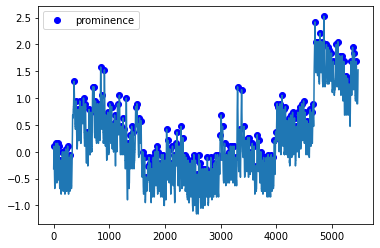

In [18]:
plt.subplot()
plt.plot(peaks, k[peaks], "ob"); plt.plot(k); plt.legend(['prominence']) 

These are the index of Peaks ( Considered as time as it's 1 second )

if it's in milliseconds, then the difference would still be the same but counted in Milliseconds. If it's in seconds or hours doesn't matter as difference will come out same.

In [19]:
peaks

array([   6,   39,   69,   94,  121,  157,  188,  219,  251,  280,  302,
        367,  403,  438,  468,  504,  537,  572,  599,  634,  668,  701,
        722,  751,  784,  817,  845,  876,  912,  941,  973, 1009, 1040,
       1065, 1094, 1125, 1148, 1182, 1214, 1246, 1273, 1306, 1341, 1371,
       1401, 1432, 1474, 1495, 1512, 1542, 1570, 1602, 1634, 1661, 1693,
       1712, 1738, 1763, 1791, 1822, 1852, 1882, 1909, 1938, 1970, 2003,
       2030, 2060, 2087, 2116, 2136, 2159, 2192, 2217, 2251, 2288, 2321,
       2353, 2384, 2418, 2450, 2483, 2519, 2548, 2582, 2608, 2632, 2668,
       2704, 2733, 2763, 2793, 2824, 2858, 2887, 2910, 2947, 2978, 2995,
       3012, 3036, 3073, 3108, 3144, 3178, 3206, 3240, 3272, 3306, 3343,
       3378, 3420, 3453, 3488, 3517, 3543, 3570, 3602, 3629, 3660, 3691,
       3724, 3748, 3774, 3796, 3821, 3853, 3881, 3912, 3939, 3968, 3991,
       4015, 4040, 4068, 4103, 4133, 4166, 4196, 4227, 4260, 4294, 4330,
       4364, 4392, 4426, 4459, 4493, 4519, 4549, 45

# FINDING PEAK WIDTH

Finding difference in corresponding x-axis of peaks. ( difference of time of crests )

In [20]:
difference = [] # creating a label
for i in range(0, len(peaks), 2):
  diff = peaks[i+1] - peaks[i]
  difference.append(diff)

difference = pd.DataFrame(difference)

In [21]:
difference.columns = ['width']

In [24]:
len(peaks)

178

In [23]:
len(difference)

89

In [25]:
difference[:10] # oradeeo breath was milliseconds so this is in millisecinds

,width
0,33
1,25
2,36
3,31
4,29
5,65
6,35
7,36
8,35
9,35


In [40]:
#x = df.to_numpy()
#y = x.ravel() # to 1D

Download this dataframe, will show on the left bar after download

In [37]:
difference.to_csv('FILE_NAME.csv') # Edit file name

# For Plotting Purpose

To check values and see the plot of data

In [29]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_widths

breath_series = k

indices = find_peaks(breath_series, prominence=0.1)[0] # use threshold=10 or prominence=0.1

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=breath_series,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
        x=indices,
        y=[breath_series[j] for j in indices],
        mode='markers',
        marker=dict(
             size=8,
             color='red',
             symbol='cross'
            ),
        name='Detected Peaks'
            ))
fig.show()

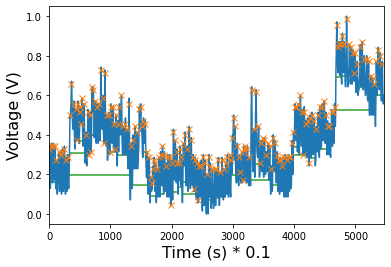

<Figure size 432x288 with 0 Axes>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths


df = pd.read_csv('data_Pradeep.csv')

x = df.iloc[1:,:1]
y = df.iloc[1:,1]
n_y = (y-y.min())/(y.max()-y.min())#Do this for normalizing the data.

#peak = find_peaks(y, height = )
#d = scaler.fit_transform(y)
peaks, _ = find_peaks(n_y)
results = peak_widths(n_y, peaks, rel_height=0.85)
plt.plot(n_y)
plt.plot(peaks,n_y[peaks],"x")
plt.hlines(*results[1:], color='C2')
plt.xlabel('Time (s) * 0.1', size = 16)
plt.ylabel('Voltage (V)', size = 16)
plt.xlim(0,5466)
plt.show()
plt.tight_layout()

In [5]:
peaks

array([   5,   38,   68,   93,  120,  156,  187,  218,  250,  279,  301,
        341,  366,  402,  437,  451,  467,  503,  511,  521,  536,  571,
        598,  633,  653,  667,  682,  700,  721,  750,  783,  816,  844,
        875,  895,  911,  940,  972,  991, 1008, 1039, 1064, 1078, 1093,
       1124, 1147, 1181, 1213, 1245, 1272, 1305, 1340, 1370, 1400, 1431,
       1473, 1494, 1511, 1541, 1569, 1601, 1633, 1660, 1682, 1692, 1711,
       1737, 1762, 1790, 1821, 1851, 1881, 1908, 1937, 1969, 1986, 2002,
       2029, 2059, 2086, 2092, 2115, 2135, 2158, 2191, 2216, 2250, 2287,
       2320, 2352, 2370, 2383, 2417, 2431, 2449, 2482, 2518, 2547, 2581,
       2607, 2631, 2667, 2703, 2732, 2762, 2792, 2823, 2857, 2886, 2909,
       2946, 2977, 2994, 3011, 3035, 3072, 3107, 3119, 3143, 3160, 3177,
       3205, 3239, 3271, 3305, 3342, 3377, 3419, 3445, 3452, 3487, 3516,
       3542, 3569, 3601, 3628, 3659, 3690, 3723, 3747, 3773, 3795, 3820,
       3852, 3880, 3911, 3938, 3967, 3990, 4014, 40